In [60]:
import lasair
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 500

In [61]:
my_topic = 'lasair_2SN-likecandidates'
my_topicTiDES = 'lasair_19tidesSelect'

In [73]:
from random import randrange
group_id = 'test{}'.format(randrange(1000))
#group_id = 'testTiDES1'
print('Using group_id', group_id)

Using group_id testTiDES1


In [79]:
consumer = lasair.lasair_consumer('kafka.lsst.ac.uk:9092', group_id, my_topicTiDES)

In [80]:
n = 0
while n < 10:
    msg = consumer.poll(timeout=20)
    if msg is None:
        break
    if msg.error():
        print(str(msg.error()))
        break
    jmsg = json.loads(msg.value())
    print(json.dumps(jmsg, indent=2))
    n += 1

In [76]:
consumer

In [77]:
jmsg

{'objectId': 'ZTF22aaavmst',
 'ramean': 105.99108171666667,
 'decmean': 33.026286075,
 'mjdmin': 59625.164583299775,
 'mjdmax': 59636.20538190007,
 'magrmin': 17.657,
 'maggmin': 17.7621,
 'rmag': 17.7526,
 'gmag': 17.884,
 'classification': 'SN',
 'UTC': '2022-02-26 05:19:10'}

In [78]:
token = 'bb6772e74473f2c7bceb698ae1c377d83b8f7223'
L = lasair.lasair_client(token)
c = L.lightcurves(['ZTF21abccdld','ZTF22aaafjir'])
print(c)

[[{'candid': 1582404031615035005, 'jd': 2459336.9040394, 'ra': 239.1742503, 'dec': 68.3786189, 'fid': 1, 'nid': 1582, 'magpsf': 19.71969985961914, 'sigmapsf': 0.20558999478816986, 'isdiffpos': 't', 'ssdistnr': None, 'ssnamenr': None, 'drb': None}, {'candid': 1585367281615015011, 'jd': 2459339.8672801, 'ra': 239.1738591, 'dec': 68.3787455, 'fid': 1, 'nid': 1585, 'magpsf': 19.729700088500977, 'sigmapsf': 0.1431950032711029, 'isdiffpos': 't', 'ssdistnr': None, 'ssnamenr': None, 'drb': None}, {'candid': 1587328941615015023, 'jd': 2459341.8289468, 'ra': 239.1740442, 'dec': 68.3786226, 'fid': 1, 'nid': 1587, 'magpsf': 19.79840087890625, 'sigmapsf': 0.12085700035095215, 'isdiffpos': 't', 'ssdistnr': None, 'ssnamenr': None, 'drb': None}, {'candid': 1588387252915015015, 'jd': 2459342.8872569, 'ra': 239.1742599, 'dec': 68.3787169, 'fid': 1, 'nid': 1588, 'magpsf': 19.60449981689453, 'sigmapsf': 0.14295299351215363, 'isdiffpos': 't', 'ssdistnr': None, 'ssnamenr': None, 'drb': None}, {'candid': 158

In [68]:
lc = pd.json_normalize(c[1])

In [69]:
lc

,candid,jd,ra,dec,fid,nid,magpsf,sigmapsf,isdiffpos,ssdistnr,ssnamenr,drb
0,1867469973315015005,2.459622e+06,192.698103,77.313901,1,1867,17.265400,0.041820,t,NaN,None,0.999991
1,1867469973315025006,2.459622e+06,192.698099,77.313901,1,1867,17.266001,0.046375,t,NaN,None,NaN
2,1868465534415015003,2.459623e+06,192.698224,77.313896,1,1868,17.301399,0.046000,t,NaN,None,NaN
3,1868529304415015004,2.459623e+06,192.698106,77.313932,2,1868,17.189899,0.037537,t,NaN,None,NaN
4,1869238363315015007,2.459624e+06,192.697973,77.313935,1,1869,17.280300,0.053770,t,NaN,None,NaN
5,1869362293315015000,2.459624e+06,192.698123,77.313942,2,1869,17.162600,0.044786,t,NaN,None,NaN
6,1870407974415015004,2.459625e+06,192.698154,77.313935,2,1870,17.177799,0.037742,t,NaN,None,NaN
7,1870513244415015003,2.459625e+06,192.698117,77.313933,1,1870,17.303101,0.051615,t,NaN,None,NaN
8,1871221703315015001,2.459626e+06,192.697953,77.313928,1,1871,17.342600,0.052233,t,NaN,None,NaN
9,1871284373315015004,2.459626e+06,192.698154,77.313929,2,1871,17.246201,0.053270,t,NaN,None,NaN


In [70]:
gIDX = lc['fid']==1
rIDX = lc['fid']==2
nonDets = lc['candid'].isna()
FiveSig = 1.09/lc['sigmapsf'] >= 5

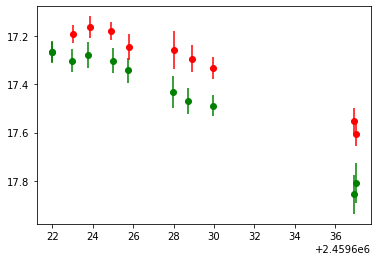

In [71]:
plt.errorbar(lc['jd'][gIDX & FiveSig], lc['magpsf'][gIDX & FiveSig], yerr=lc['sigmapsf'][gIDX & FiveSig], fmt='o', color='green')
plt.errorbar(lc['jd'][rIDX & FiveSig], lc['magpsf'][rIDX & FiveSig], yerr=lc['sigmapsf'][rIDX & FiveSig], fmt='o', color='red')

plt.gca().invert_yaxis()

In [72]:
1.09/lc['sigmapsf']

0     26.064084
1     23.504044
2     23.695652
3     29.038015
4     20.271528
5     24.337963
6     28.880292
7     21.117892
8     20.868034
9     20.461798
10    16.140496
11    13.763148
12    20.459878
13    19.638932
14    25.936326
15    23.777840
16    19.646365
17    13.404167
18    12.882942
19    21.266058
Name: sigmapsf, dtype: float64